In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Đọc dữ liệu
df = pd.read_csv(r'C:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH1\forest+fires\Data.csv')

In [3]:
# Tính ma trận tương quan
correlation_matrix = df.corr()

In [4]:
# Ngưỡng loại bỏ các biến có tương quan cao
threshold = 0.9
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

In [5]:
# Loại bỏ các biến có tương quan cao và cột mục tiêu 'area'
X_reduced = df.drop(to_drop + ['area'], axis=1)

In [6]:
# Tính hệ số VIF để kiểm tra đa cộng tuyến
vif_data = pd.DataFrame()
vif_data["Feature"] = X_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
   Feature        VIF
0        X   7.283197
1        Y  18.898586
2    month  60.364591
3      day   2.983570
4     FFMC  77.990219
5      DMC   9.718019
6       DC  47.371322
7      ISI   6.479903
8     temp  28.937595
9       RH  12.346541
10    wind   6.950291
11    rain   1.041421


In [7]:
# Tách dữ liệu thành biến độc lập (X) và biến phụ thuộc (y)
X = X_reduced
y = df['area']

In [8]:
# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
# Dự đoán trên tập dữ liệu huấn luyện
y_pred = model.predict(X)

In [10]:
# Đánh giá mô hình
print("\nĐánh giá mô hình hồi quy tuyến tính:")
print("R-squared:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))


Đánh giá mô hình hồi quy tuyến tính:
R-squared: 0.03767895029607371
MAE: 1.1240886148914715
MSE: 1.8782971854447854
RMSE: 1.3705098268326228


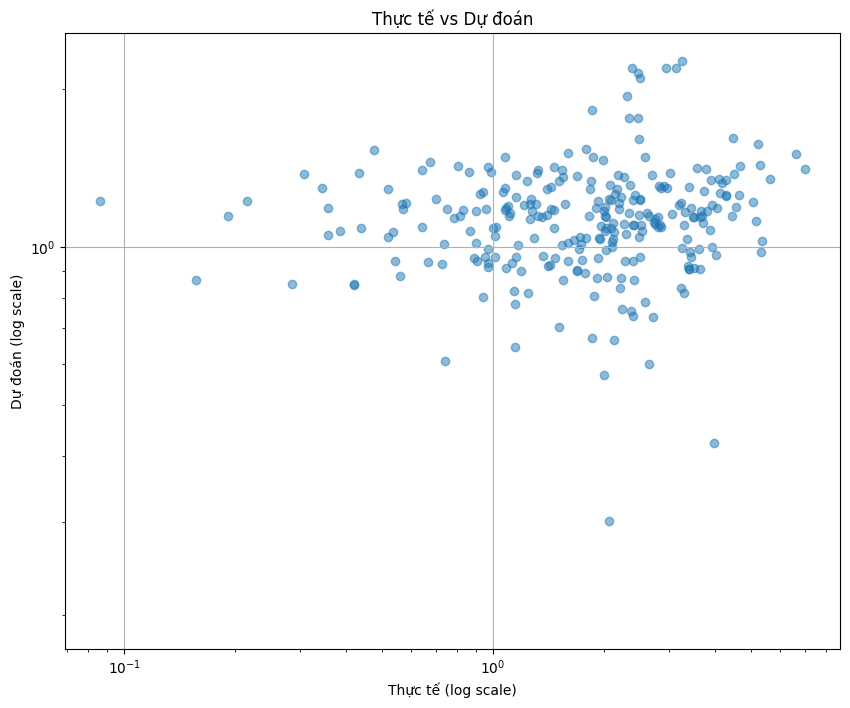

In [11]:
# Vẽ biểu đồ thực tế vs dự đoán
plt.figure(figsize=(10, 8))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Thực tế (log scale)")
plt.ylabel("Dự đoán (log scale)")
plt.title("Thực tế vs Dự đoán")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

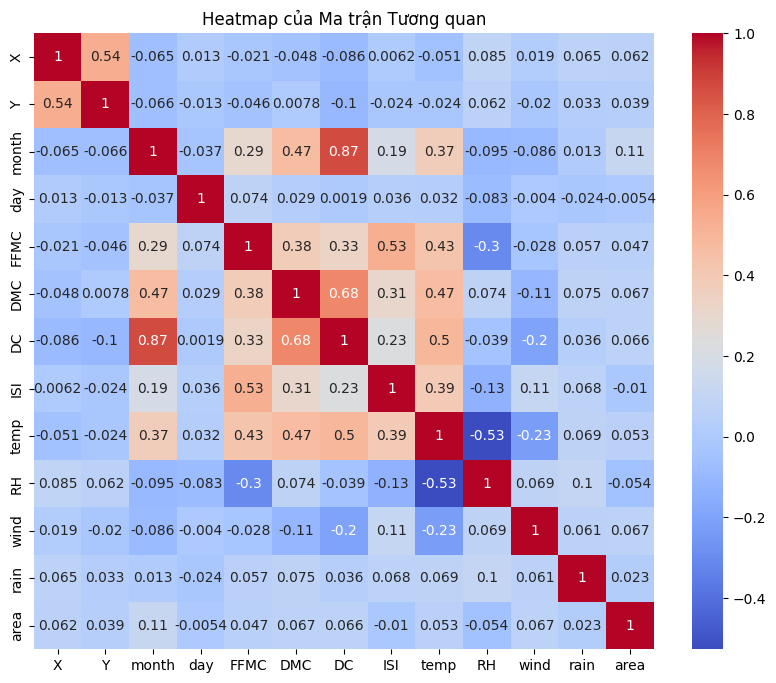

In [12]:
# Vẽ heatmap để quan sát ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap của Ma trận Tương quan")
plt.show()